# Work with categorical Data

Machine Learning algorithms require that input data must be in numerical format. Only then the algorithms work successfully on them. So, the text data must be converted into numbers before they are fed into an algorithm.

as we said before Categorical data can be **Ordinal** or **Nominal**


### Ordinal variable
can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M.


### Nominal variable
nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.




## Table of Contents
1. Work with Ordinal Features with pandas `map` method.
2. Work with Nominal Features with pandas `get_dummies` method.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [3]:
df = pd.read_csv('t-shirts.csv')
df

,Date ordered,Order number,Brand,Size,Color,Design,Price,Delivery status
0,2016-05-05,SDH-YU0,Yolo,L,red,spiral,14.47,damaged
1,2016-05-06,SDH-YU1,Yolo,XXL,green,spiral,16.24,delayed
2,2016-05-07,SDH-YU2,BLOT,XL,black,Stripes,14.32,delivered
3,2016-05-08,SDH-YU3,Kent,XXL,green,plain,14.07,damaged
4,2016-05-09,SDH-YU4,BUCK,XL,white,spiral,15.56,order received
...,...,...,...,...,...,...,...,...
495,2017-09-12,SDH-YU495,Wang,XS,green,diamond,15.03,damaged
496,2017-09-13,SDH-YU496,BUCK,M,black,Stripes,14.49,shipping
497,2017-09-14,SDH-YU497,Kent,XXL,purple,plain,15.61,shipping
498,2017-09-15,SDH-YU498,Yolo,S,red,plain,13.49,order received


## Make some EDA and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date ordered     500 non-null    object 
 1   Order number     500 non-null    object 
 2   Brand            500 non-null    object 
 3   Size             500 non-null    object 
 4   Color            500 non-null    object 
 5   Design           500 non-null    object 
 6   Price            500 non-null    float64
 7   Delivery status  500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [6]:
df['Brand'].value_counts()

Brand
Yolo    109
Kent    107
BUCK    104
Wang    103
BLOT     77
Name: count, dtype: int64

In [7]:
df['Size'].value_counts()

Size
XXL    94
S      88
XS     88
M      82
L      75
XL     73
Name: count, dtype: int64

In [8]:
df['Color'].value_counts()

Color
green     104
indigo     89
red        78
purple     78
black      77
white      74
Name: count, dtype: int64

In [9]:
df['Design'].value_counts()

Design
diamond    117
checked    107
Stripes    106
spiral      89
plain       81
Name: count, dtype: int64

C:\Users\Baraa\AppData\Local\Temp\ipykernel_15004\4098590609.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=df, palette='viridis')


<Axes: xlabel='Brand', ylabel='Price'>

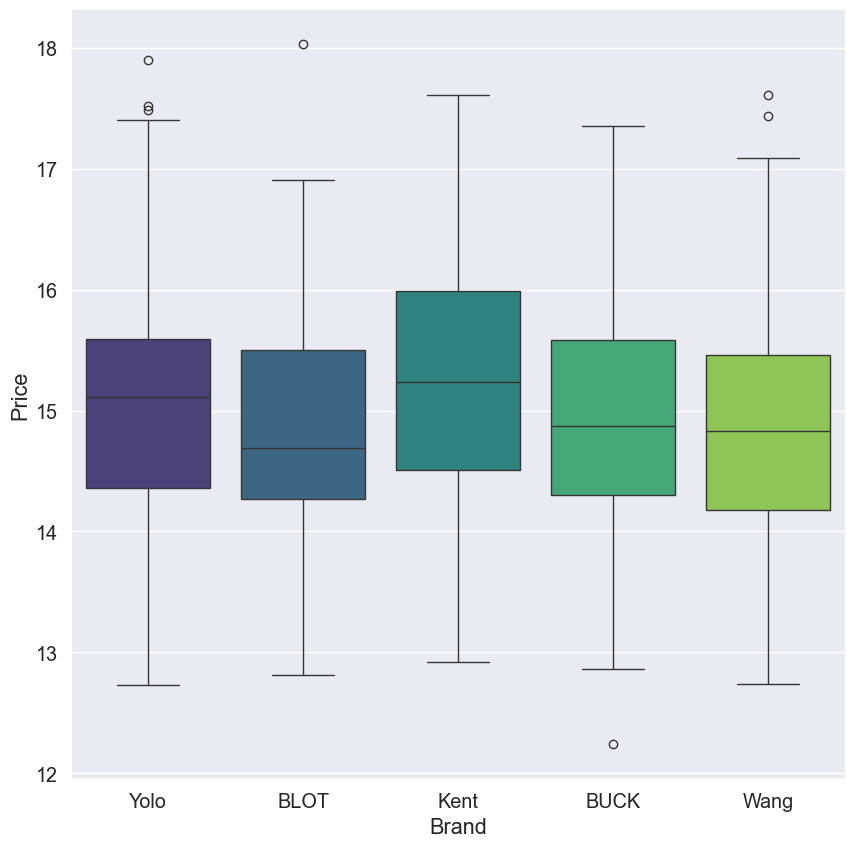

In [10]:
sns.boxplot(x='Brand', y='Price', data=df, palette='viridis')

C:\Users\Baraa\AppData\Local\Temp\ipykernel_15004\3350343937.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Size', y='Price', data=df, palette='viridis')


<Axes: xlabel='Size', ylabel='Price'>

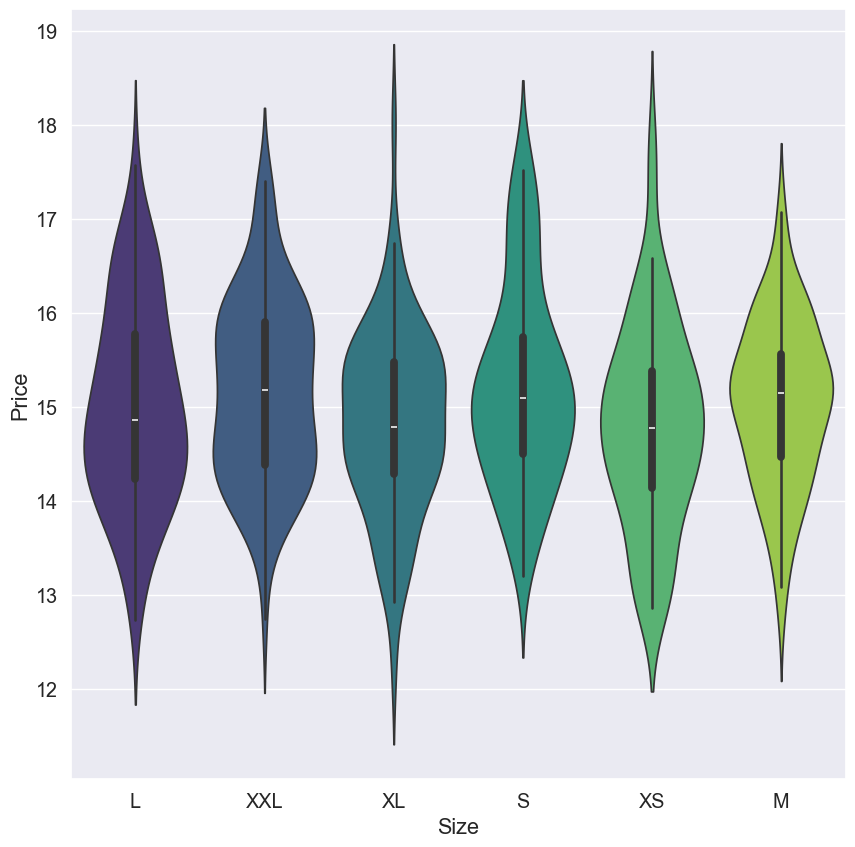

In [11]:
sns.violinplot(x='Size', y='Price', data=df, palette='viridis')

C:\Users\Baraa\AppData\Local\Temp\ipykernel_15004\784296154.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Design', y='Price', data=df, palette='viridis')


<Axes: xlabel='Design', ylabel='Price'>

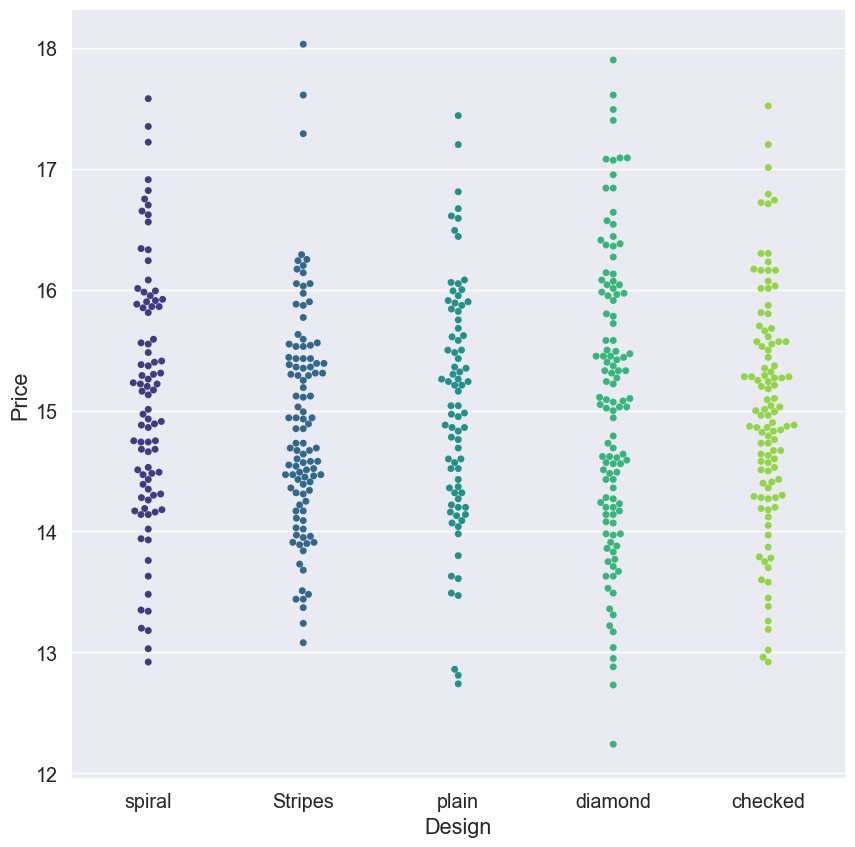

In [12]:
sns.swarmplot(x='Design', y='Price', data=df, palette='viridis')

**Extracted Info**
- Design, Color, Brand are Nominal Categorical features
- Size is Ordinal Categorical feature

## 1) Work with Ordinal Features with pandas `map` method.

Ordinal features are those with some order associated with them. We can tell from the sample of ordinal features below these features have an order that may be important.

For example we have Size column contains ordinal data so that XS < S < M < L < XL < XXL

In [16]:
df['Size'].value_counts()

Size
XXL    94
S      88
XS     88
M      82
L      75
XL     73
Name: count, dtype: int64

In [17]:
size_dict = {'XS':1,
        'S':2,
        'M':3,
        'L':4,
        'XL':5,
        'XXL':6}

# apply using map
df['Size'] = df['Size'].map(size_dict)

In [18]:
df.head()

,Date ordered,Order number,Brand,Size,Color,Design,Price,Delivery status
0,2016-05-05,SDH-YU0,Yolo,4,red,spiral,14.47,damaged
1,2016-05-06,SDH-YU1,Yolo,6,green,spiral,16.24,delayed
2,2016-05-07,SDH-YU2,BLOT,5,black,Stripes,14.32,delivered
3,2016-05-08,SDH-YU3,Kent,6,green,plain,14.07,damaged
4,2016-05-09,SDH-YU4,BUCK,5,white,spiral,15.56,order received


**note**<br>
you can use `LabelEncoder` from sklearn to generate the integer volumns from categorical features.

### Get The Inverse

In [21]:
inv_size_mapping = {v: k for k, v in size_dict.items()}
inv_size_mapping

{1: 'XS', 2: 'S', 3: 'M', 4: 'L', 5: 'XL', 6: 'XXL'}

In [22]:
df['size_inv'] = df['Size'].map(inv_size_mapping)
df

,Date ordered,Order number,Brand,Size,Color,Design,Price,Delivery status,size_inv
0,2016-05-05,SDH-YU0,Yolo,4,red,spiral,14.47,damaged,L
1,2016-05-06,SDH-YU1,Yolo,6,green,spiral,16.24,delayed,XXL
2,2016-05-07,SDH-YU2,BLOT,5,black,Stripes,14.32,delivered,XL
3,2016-05-08,SDH-YU3,Kent,6,green,plain,14.07,damaged,XXL
4,2016-05-09,SDH-YU4,BUCK,5,white,spiral,15.56,order received,XL
...,...,...,...,...,...,...,...,...,...
495,2017-09-12,SDH-YU495,Wang,1,green,diamond,15.03,damaged,XS
496,2017-09-13,SDH-YU496,BUCK,3,black,Stripes,14.49,shipping,M
497,2017-09-14,SDH-YU497,Kent,6,purple,plain,15.61,shipping,XXL
498,2017-09-15,SDH-YU498,Yolo,2,red,plain,13.49,order received,S


## 2) Work with Nominal Features with pandas `get_dummies` method.

<img src='https://miro.medium.com/max/1400/1*hZLqbZqqrwiqkGxxl2vYkg.png'>

Nominal features are categorical features that have no numerical importance. Order does not matter.

One-hot encoding is a better technique when order doesn’t matter. For example, in the feature Color or Brand there is no obvious order here. One value is not better than another.

In a situation like this, where order doesn’t matter, integer encoding could lead to poor model performance and should not be used.

In one hot encoding, a new binary (dummy) variable is created for each unique value in the categorical variable. For example In the chart above, we had three unique colors and so we create three new features, one for each color. If the value is true, the integer 1 is placed in the field, if false then a 0.

In [25]:
df['Design'].value_counts()

Design
diamond    117
checked    107
Stripes    106
spiral      89
plain       81
Name: count, dtype: int64

In [26]:
df['Color'].value_counts()

Color
green     104
indigo     89
red        78
purple     78
black      77
white      74
Name: count, dtype: int64

In [27]:
df['Brand'].value_counts()

Brand
Yolo    109
Kent    107
BUCK    104
Wang    103
BLOT     77
Name: count, dtype: int64

In [28]:
df['Delivery status'].value_counts()

Delivery status
order received    106
shipping          104
damaged           100
delayed            95
delivered          95
Name: count, dtype: int64

In [29]:
df = pd.get_dummies(df, columns=['Design', 'Color', 'Brand', 'Delivery status'], drop_first=True)

In [30]:
df

,Date ordered,Order number,Size,Price,size_inv,Design_checked,Design_diamond,Design_plain,Design_spiral,Color_green,...,Color_red,Color_white,Brand_BUCK,Brand_Kent,Brand_Wang,Brand_Yolo,Delivery status_delayed,Delivery status_delivered,Delivery status_order received,Delivery status_shipping
0,2016-05-05,SDH-YU0,4,14.47,L,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
1,2016-05-06,SDH-YU1,6,16.24,XXL,False,False,False,True,True,...,False,False,False,False,False,True,True,False,False,False
2,2016-05-07,SDH-YU2,5,14.32,XL,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2016-05-08,SDH-YU3,6,14.07,XXL,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
4,2016-05-09,SDH-YU4,5,15.56,XL,False,False,False,True,False,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2017-09-12,SDH-YU495,1,15.03,XS,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
496,2017-09-13,SDH-YU496,3,14.49,M,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
497,2017-09-14,SDH-YU497,6,15.61,XXL,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
498,2017-09-15,SDH-YU498,2,13.49,S,False,False,True,False,False,...,True,False,False,False,False,True,False,False,True,False


we use `drop_first` to get k-1 features, due to the last feature will be redundant and correlated with other features so it can cause problems.

- Spiral dummy variable has been removed from Design column
- Black dummy variable has been removed from Color column
- Blot dummy variable has been removed from Brand column

**note**<br>
you can use `OneHotEncoder` from sklearn to generate the dummy variables from categorical features.

### OneHotEncoder Method

In [34]:
df = pd.read_csv('t-shirts.csv')

In [37]:
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder(sparse_output=False, drop='first')


In [39]:
Transformed_Color = Encoder.fit_transform(df[['Color']])


In [47]:
Transformed_Color_Df = pd.DataFrame(Transformed_Color , columns= Encoder.get_feature_names_out())

In [49]:
Transformed_Color_Df

,Color_green,Color_indigo,Color_purple,Color_red,Color_white
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
495,1.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,1.0,0.0,0.0
498,0.0,0.0,0.0,1.0,0.0


In [51]:
df = pd.concat([df,Transformed_Color_Df] , axis = 1 )
df.drop('Color' , axis = 1 , inplace =True)

In [53]:
df

,Date ordered,Order number,Brand,Size,Design,Price,Delivery status,Color_green,Color_indigo,Color_purple,Color_red,Color_white
0,2016-05-05,SDH-YU0,Yolo,L,spiral,14.47,damaged,0.0,0.0,0.0,1.0,0.0
1,2016-05-06,SDH-YU1,Yolo,XXL,spiral,16.24,delayed,1.0,0.0,0.0,0.0,0.0
2,2016-05-07,SDH-YU2,BLOT,XL,Stripes,14.32,delivered,0.0,0.0,0.0,0.0,0.0
3,2016-05-08,SDH-YU3,Kent,XXL,plain,14.07,damaged,1.0,0.0,0.0,0.0,0.0
4,2016-05-09,SDH-YU4,BUCK,XL,spiral,15.56,order received,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2017-09-12,SDH-YU495,Wang,XS,diamond,15.03,damaged,1.0,0.0,0.0,0.0,0.0
496,2017-09-13,SDH-YU496,BUCK,M,Stripes,14.49,shipping,0.0,0.0,0.0,0.0,0.0
497,2017-09-14,SDH-YU497,Kent,XXL,plain,15.61,shipping,0.0,0.0,1.0,0.0,0.0
498,2017-09-15,SDH-YU498,Yolo,S,plain,13.49,order received,0.0,0.0,0.0,1.0,0.0


### Binary Encoding

In [56]:
df = pd.read_csv('t-shirts.csv')

In [60]:
pip install category_encoders

  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
Note: you may need to restart the kernel to use updated packages.


In [62]:
from category_encoders import BinaryEncoder

In [64]:
encoder = BinaryEncoder()

In [66]:
Transformed_Color_Df = encoder.fit_transform(df[['Color']])

In [68]:
Transformed_Color_Df

,Color_0,Color_1,Color_2
0,0,0,1
1,0,1,0
2,0,1,1
3,0,1,0
4,1,0,0
...,...,...,...
495,0,1,0
496,0,1,1
497,1,0,1
498,0,0,1


In [70]:
df = pd.concat([df,Transformed_Color_Df] , axis = 1 )


In [72]:
df

,Date ordered,Order number,Brand,Size,Color,Design,Price,Delivery status,Color_0,Color_1,Color_2
0,2016-05-05,SDH-YU0,Yolo,L,red,spiral,14.47,damaged,0,0,1
1,2016-05-06,SDH-YU1,Yolo,XXL,green,spiral,16.24,delayed,0,1,0
2,2016-05-07,SDH-YU2,BLOT,XL,black,Stripes,14.32,delivered,0,1,1
3,2016-05-08,SDH-YU3,Kent,XXL,green,plain,14.07,damaged,0,1,0
4,2016-05-09,SDH-YU4,BUCK,XL,white,spiral,15.56,order received,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,2017-09-12,SDH-YU495,Wang,XS,green,diamond,15.03,damaged,0,1,0
496,2017-09-13,SDH-YU496,BUCK,M,black,Stripes,14.49,shipping,0,1,1
497,2017-09-14,SDH-YU497,Kent,XXL,purple,plain,15.61,shipping,1,0,1
498,2017-09-15,SDH-YU498,Yolo,S,red,plain,13.49,order received,0,0,1


#### If you want to decode the features again

In [75]:
encoder.inverse_transform(Transformed_Color_Df)

,Color
0,red
1,green
2,black
3,green
4,white
...,...
495,green
496,black
497,purple
498,red


In [77]:
df['Color']

0         red
1       green
2       black
3       green
4       white
        ...  
495     green
496     black
497    purple
498       red
499     black
Name: Color, Length: 500, dtype: object

# Great Work!